# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
#connecting to the google drive
from google.colab import drive 
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from datetime import date, datetime

In [4]:
#setting option to display all th ecolumns available
pd.set_option('display.max_columns', None)

**Loading the dataset**

In [5]:
data = pd.read_excel('/content/drive/MyDrive/Capstone/Machine Learning/Data/Supervised/Classification/default of credit card clients.xls')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


we can see that the columns are wrongly named and the actual columns are in the first row of the dataset. So we have to replace the fisrt row as the feature names.

In [6]:
data = pd.read_excel('/content/drive/MyDrive/Capstone/Machine Learning/Data/Supervised/Classification/default of credit card clients.xls',
                     names=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                            'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'])

**named the features and replaced it**

In [7]:
data.drop(data.index[0:1], inplace=True)

**The first should be dropped as it contains the column names.**

In [8]:
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

**As the PAY_0 was wrongly named and is replaced as PAY_1.**

In [9]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
#Actual columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
#shape and of the dataset
data.shape

(30000, 25)

In [12]:
#the number of unique values that each column contains
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

# **Data Cleaning**

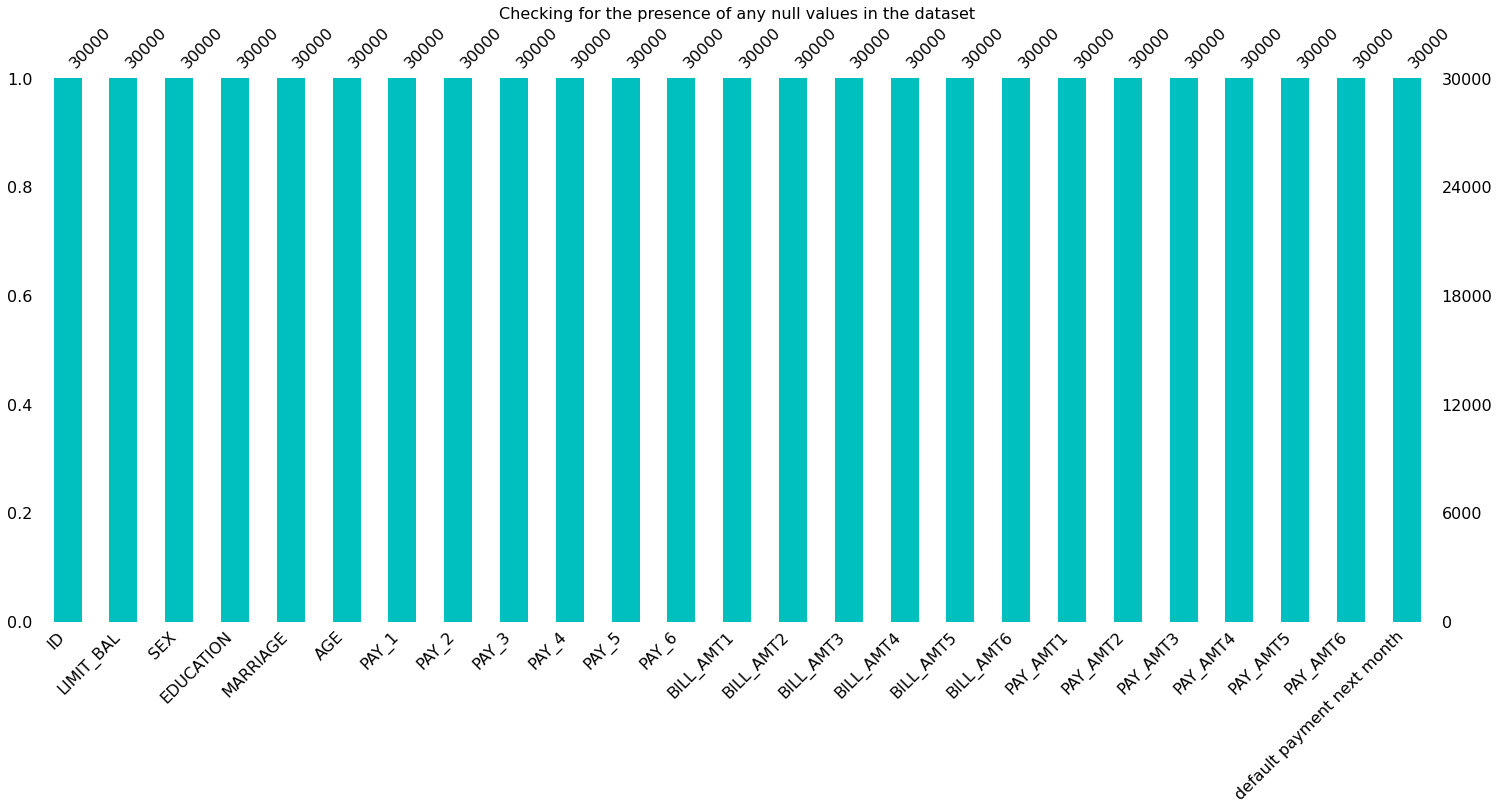

In [13]:
#checking for nan values
msno.bar(data, color='c')
plt.title('Checking for the presence of any null values in the dataset', size=16)
plt.show()

In [14]:
#showin the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

# **Exploratory Data Analysis**

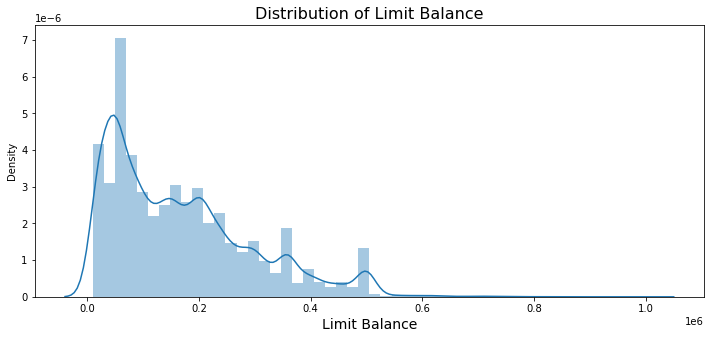

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(data['LIMIT_BAL'])
plt.title('Distribution of Limit Balance', size=16)
plt.xlabel('Limit Balance', size=14)
plt.show()

In [16]:
#selected few columns foe analysis
features = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

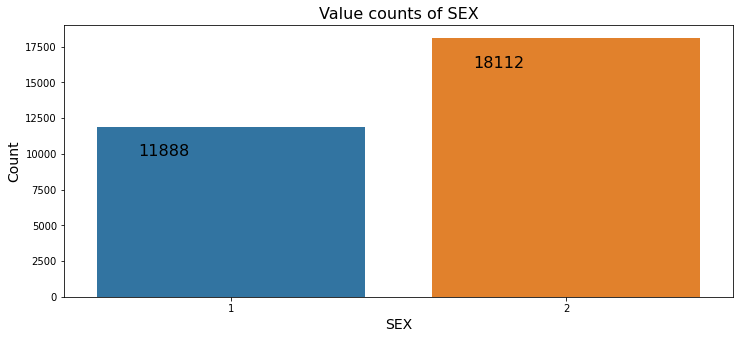

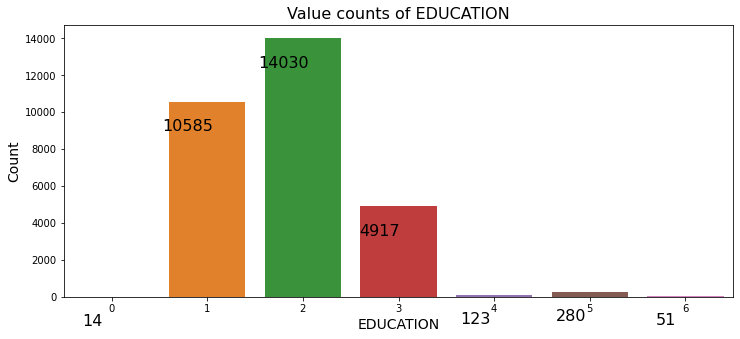

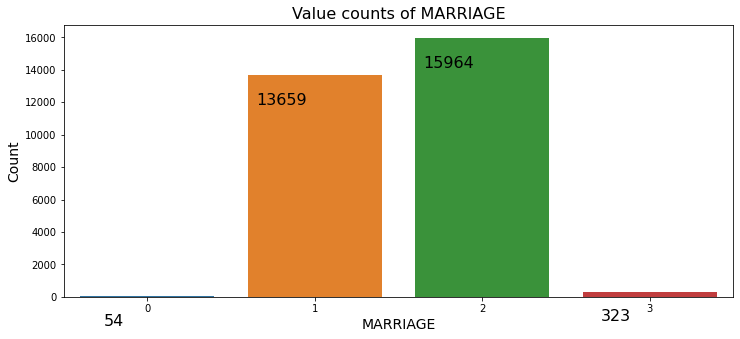

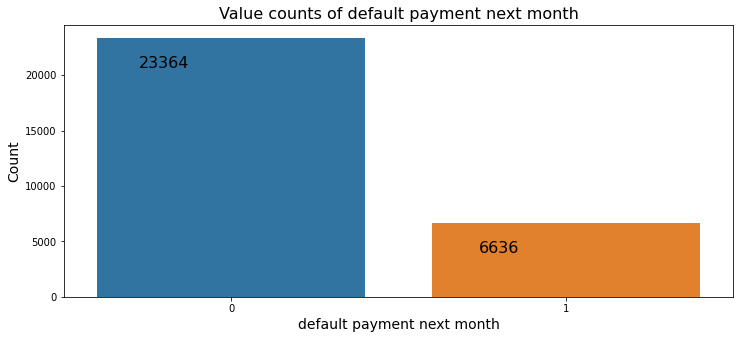

In [17]:
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    ch = sns.countplot(data[col], ax=ax)
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va = 'top', ha = 'center', size=16)
    plt.show()

There dataset contains more than 50 female customers.

Most of the Customers are from University level of education.

It is assumed that 0 is for divorced customers. Unmarried i.e., sinle customers are more in number.

The dataset contains the customers from 21 to 79 age group. Customers of age group of 29 are more

**Age Vs Default Payment Next Month**

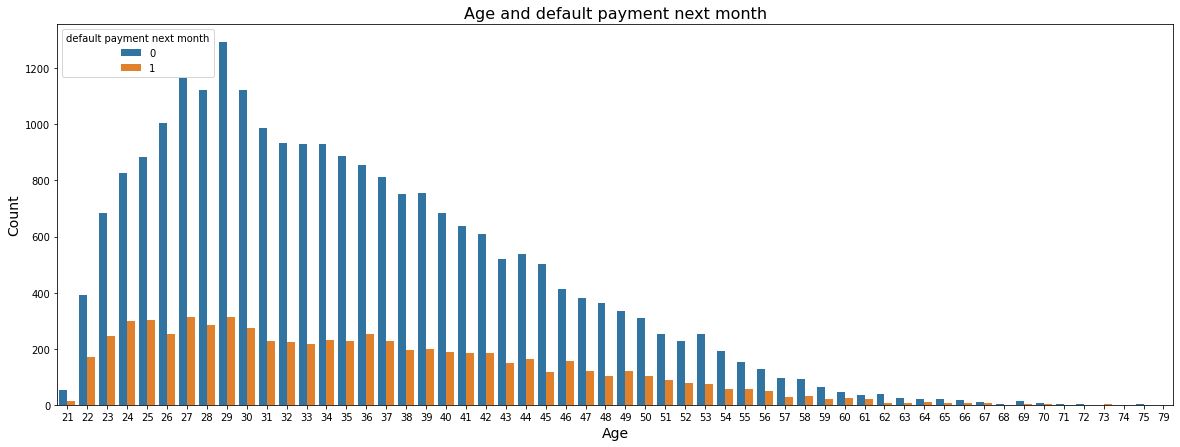

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='AGE', hue='default payment next month')
plt.title('Age and default payment next month', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Education Vs Default Payment Next Month**

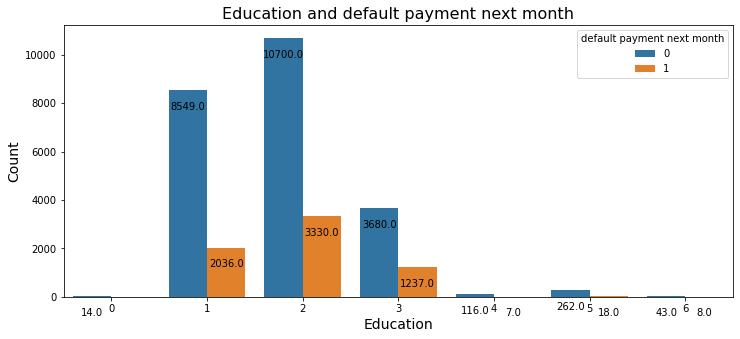

In [19]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='EDUCATION')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.title('Education and default payment next month', size=16)
plt.xlabel('Education', size=14)
plt.ylabel('Count', size=14)
plt.show()

The university level educated people are mostly paying their dues on time and they are the people who are making delay in payments also.

**Marriage Vs Default Payment Next Month**

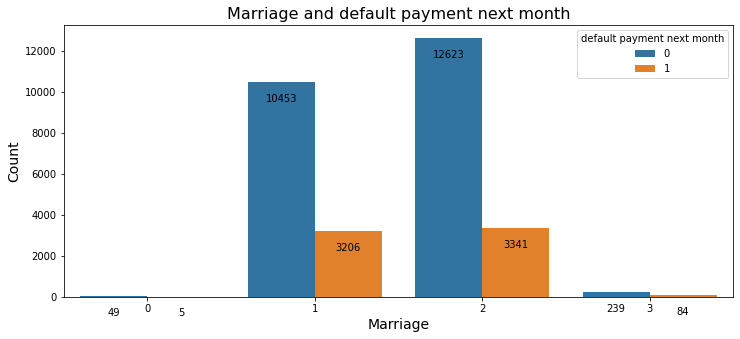

In [20]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='MARRIAGE')
plt.title('Marriage and default payment next month', size=16)
plt.xlabel('Marriage', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.show()

**Sex Vs Default Payment Next Month**

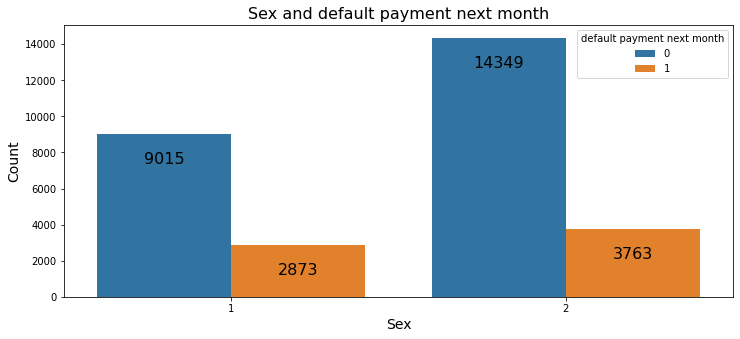

In [21]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='SEX')
plt.title('Sex and default payment next month', size=16)
plt.xlabel('Sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=16)
plt.show()

**Age Vs Default Payment Next Month**

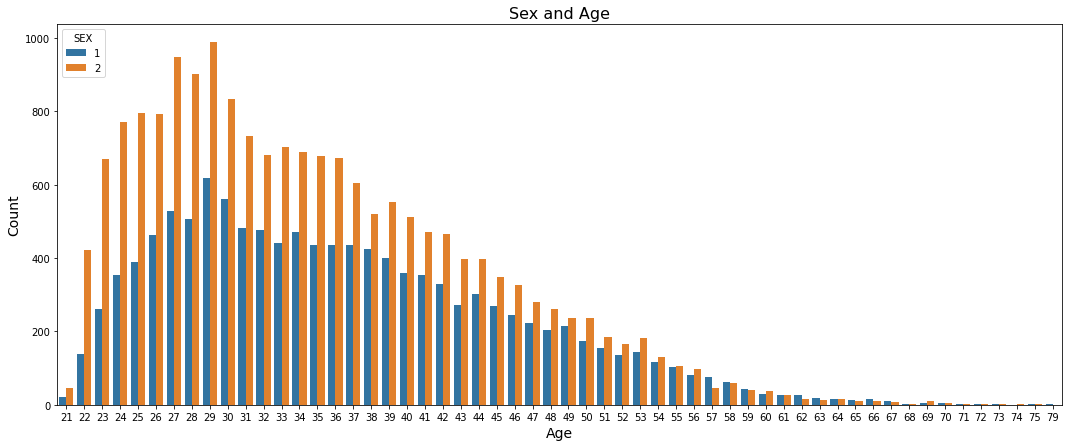

In [22]:
age = data.groupby(['AGE', 'SEX']).agg({'SEX':sum})

plt.figure(figsize=(18,7))
sns.countplot(data=data, x='AGE', hue='SEX')
plt.title('Sex and Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

In both male and female most of the customers are from the age group of 29.

**Pay Vs Default payment for next month**

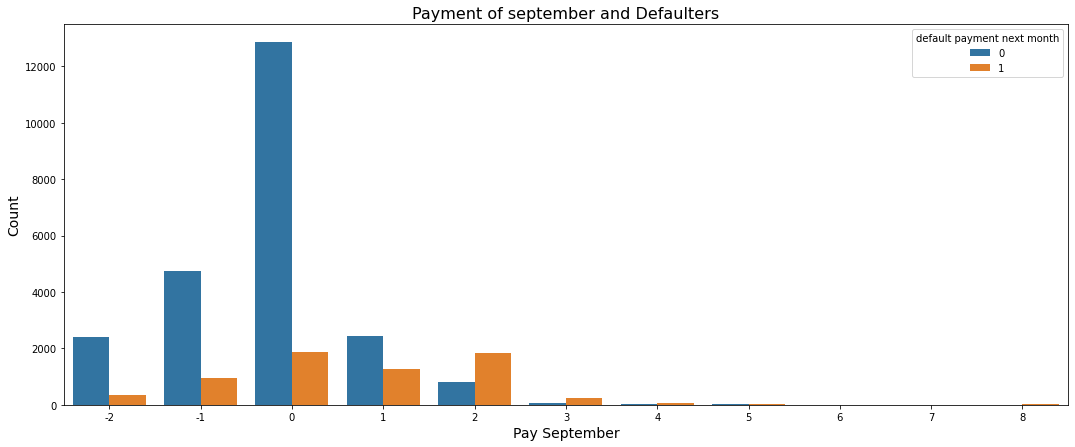

In [23]:
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_1', hue='default payment next month')
plt.title('Payment of september and Defaulters', size=16)
plt.xlabel('Pay September', size=14)
plt.ylabel('Count', size=14)
plt.show()

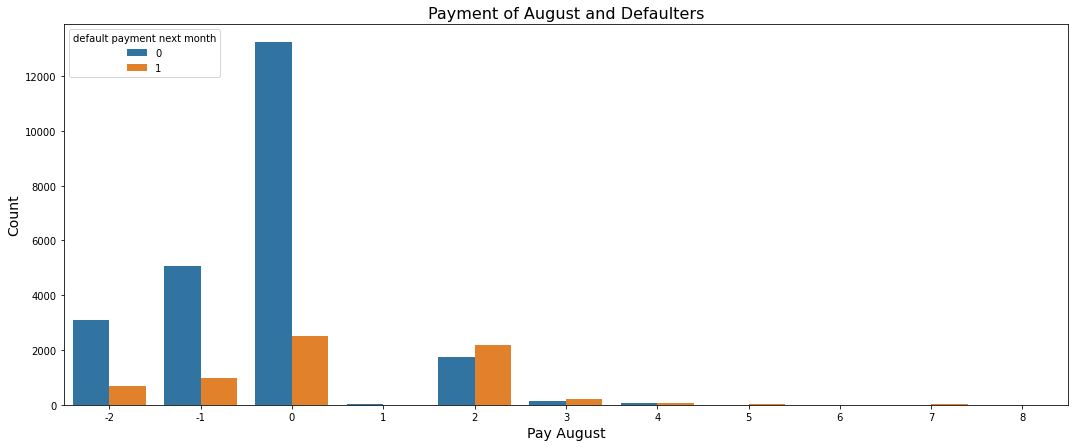

In [24]:
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_2', hue='default payment next month')
plt.title('Payment of August and Defaulters', size=16)
plt.xlabel('Pay August', size=14)
plt.ylabel('Count', size=14)
plt.show()

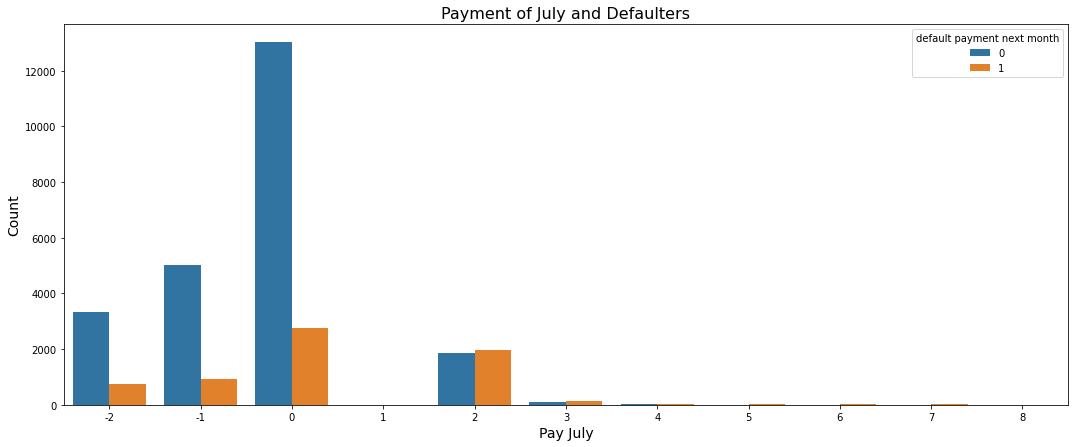

In [25]:
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_3', hue='default payment next month')
plt.title('Payment of July and Defaulters', size=16)
plt.xlabel('Pay July', size=14)
plt.ylabel('Count', size=14)
plt.show()

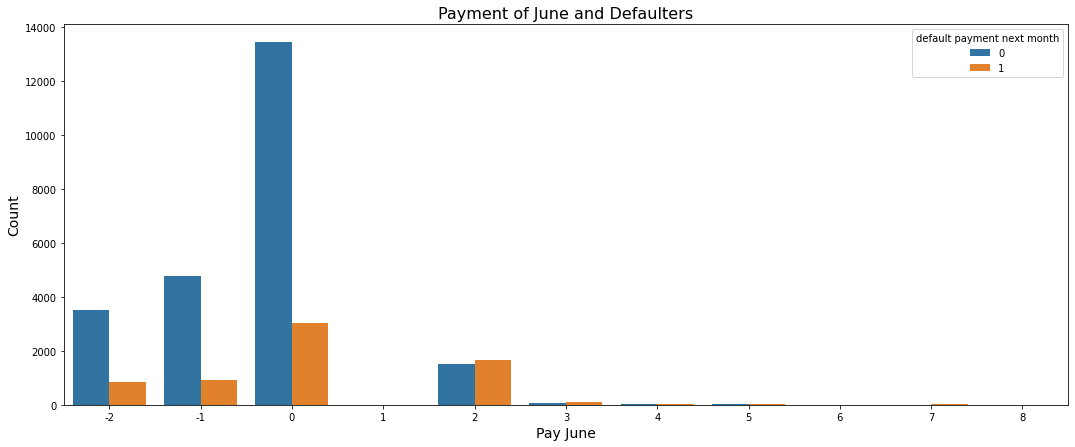

In [26]:
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_4', hue='default payment next month')
plt.title('Payment of June and Defaulters', size=16)
plt.xlabel('Pay June', size=14)
plt.ylabel('Count', size=14)
plt.show()

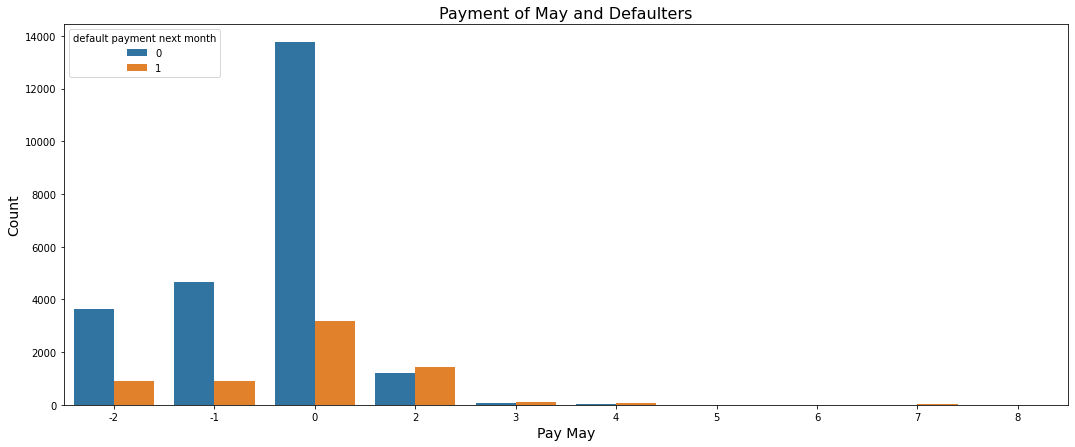

In [27]:
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_5', hue='default payment next month')
plt.title('Payment of May and Defaulters', size=16)
plt.xlabel('Pay May', size=14)
plt.ylabel('Count', size=14)
plt.show()

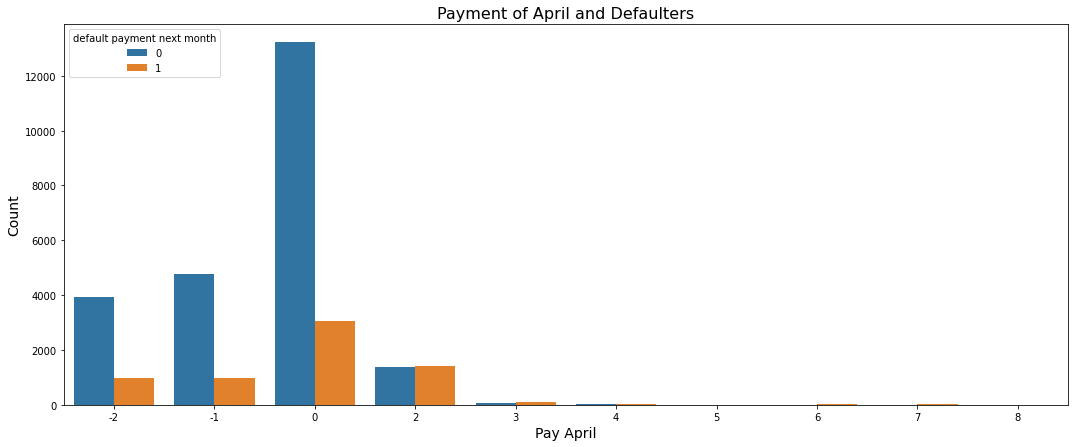

In [28]:
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_6', hue='default payment next month')
plt.title('Payment of April and Defaulters', size=16)
plt.xlabel('Pay April', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Checking for outliers**

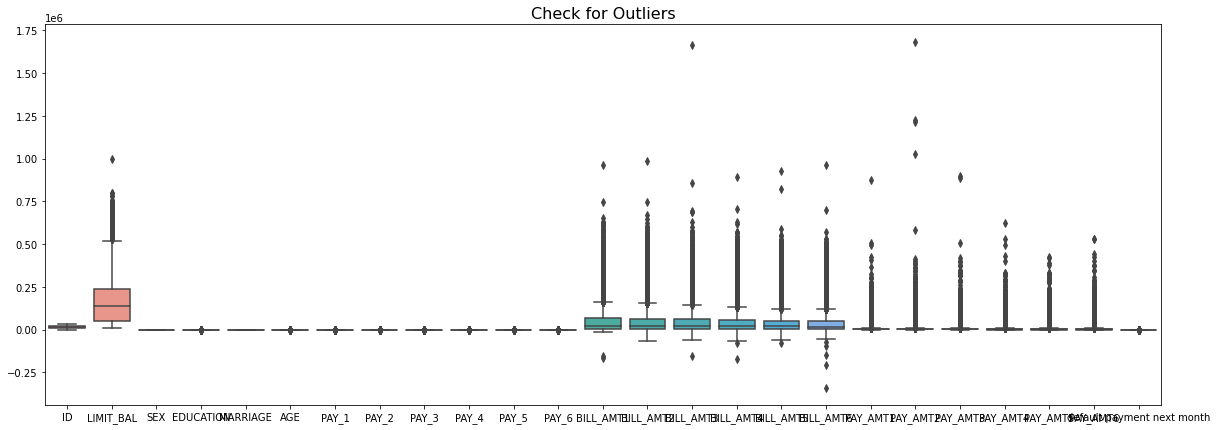

In [29]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)
plt.title('Check for Outliers', size=16)
plt.show()

**Visualization of Bill Amount**

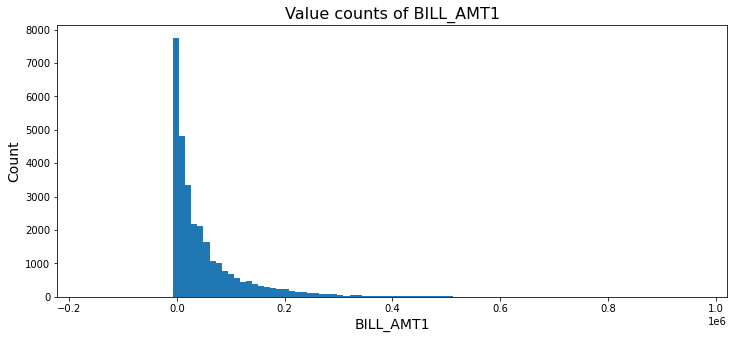

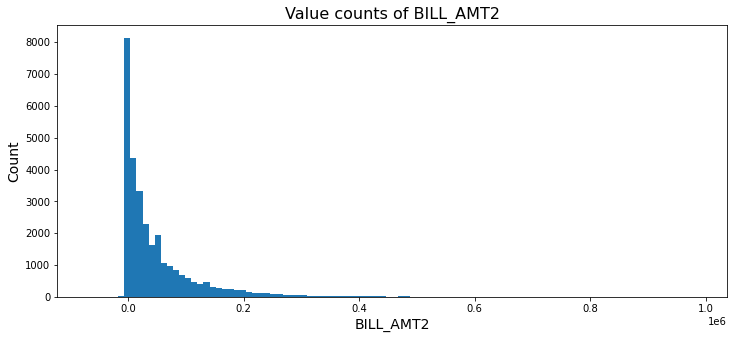

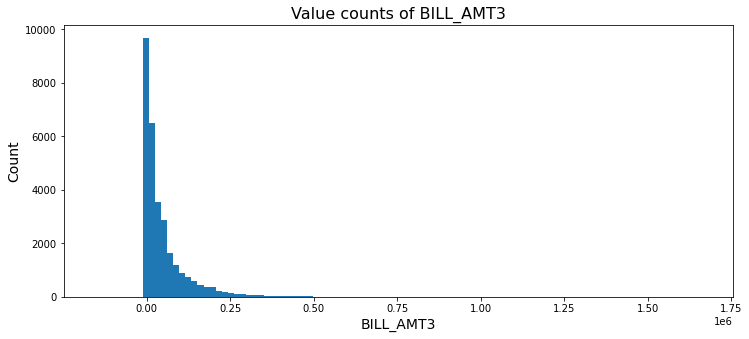

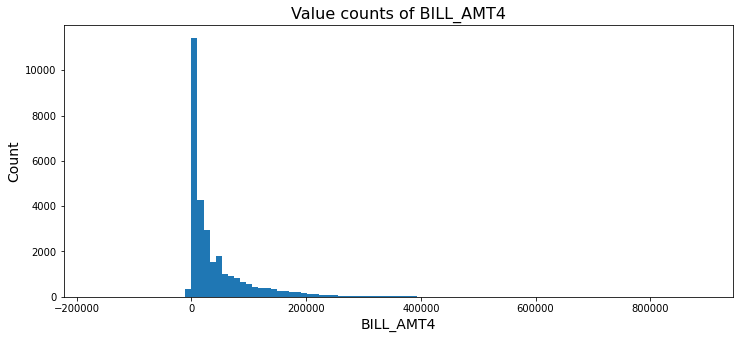

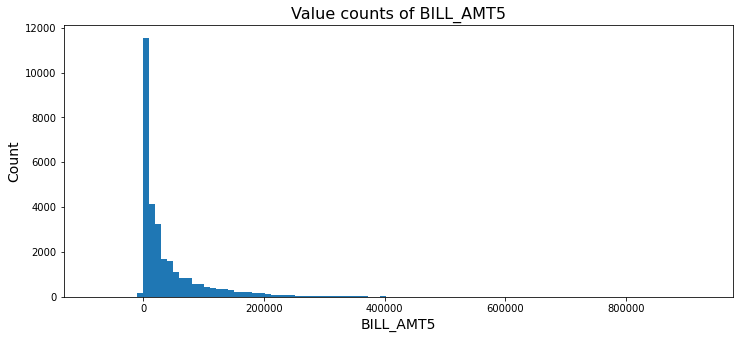

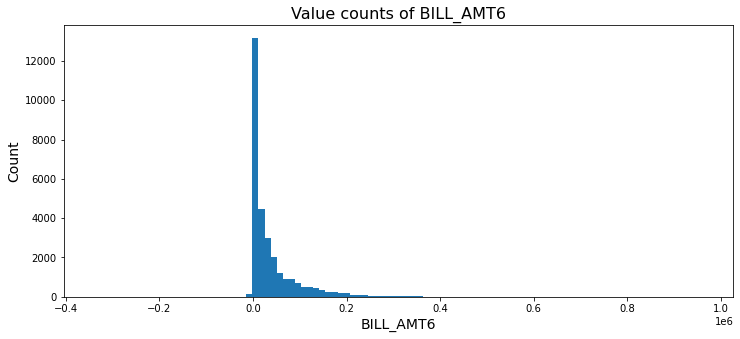

In [30]:
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for col in bill_amt:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    data[col].plot(kind='hist', bins=100)
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.show()

As the BILL_AMT columns contains negative values in it, which is assumed as there are some advance payments.

**Conversion of features**

In [31]:
features = data.columns

for col in features:
    data[col] = data[col].astype(int)

All the columns  of  int and float by the datatype is showing as object so, these are converted into numerical features

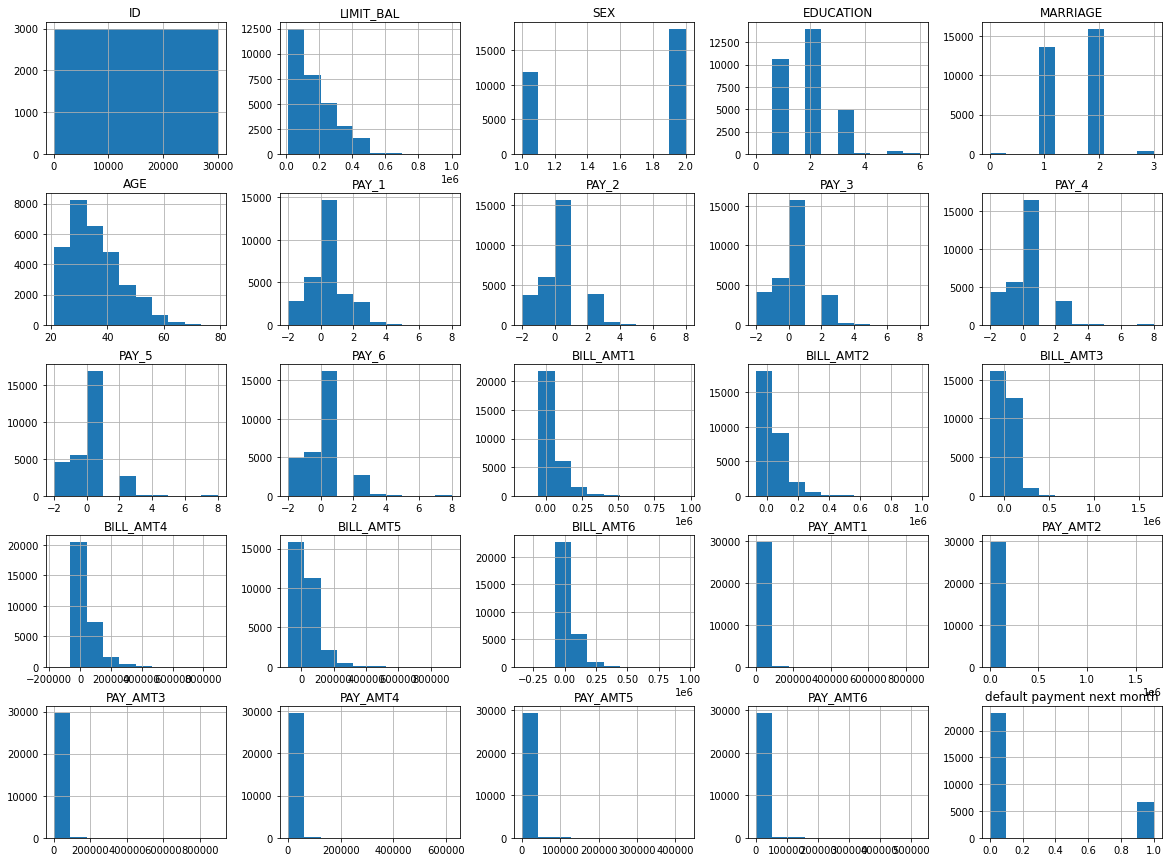

In [32]:
data.hist(figsize=(20,15))
plt.show()

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Data Preparation**

**Correlation**

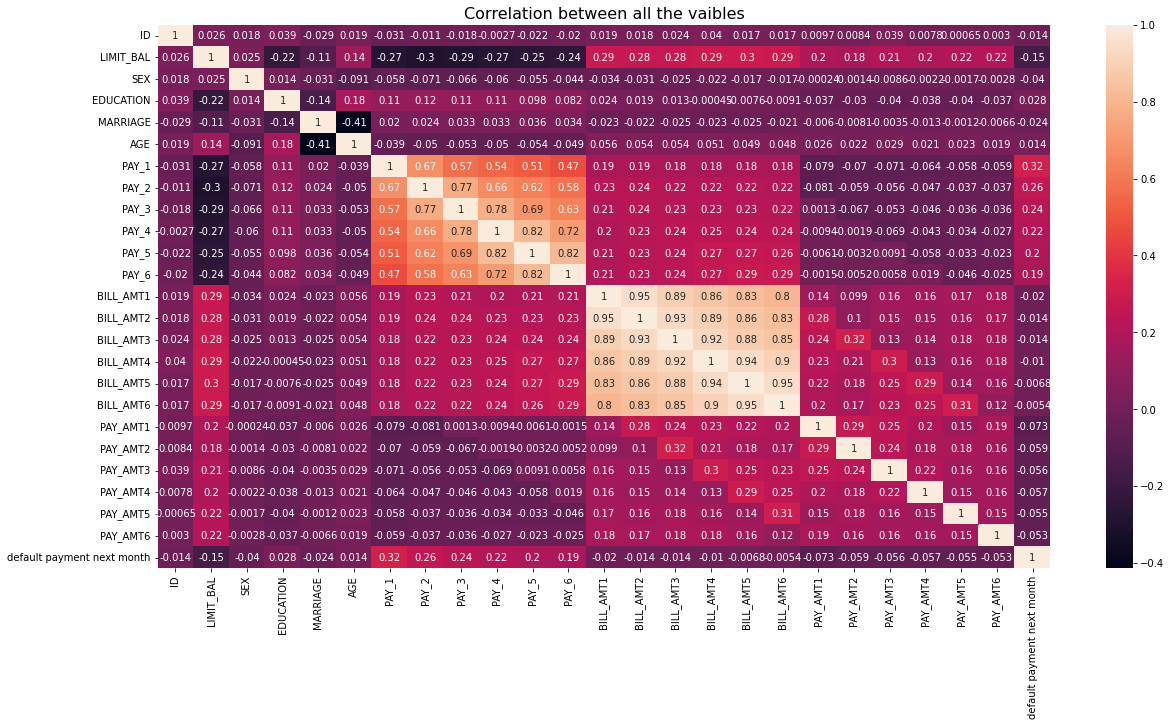

In [34]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Checking for Multicorrelation**

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [36]:
cal_vif(data[[i for i in data.describe().columns if i not in ['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                                              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]])

,Variables,VIF
0,LIMIT_BAL,3.543885
1,SEX,9.088973
2,EDUCATION,6.687151
3,MARRIAGE,6.278864
4,AGE,11.042994
5,PAY_1,1.980413
6,PAY_2,3.162652
7,PAY_3,3.704724
8,PAY_4,4.424868
9,PAY_5,4.959575


All BILL_AMT features have negative correlation among them, they are dropped.

**Dependent and Independent Variables**

In [37]:
dependent_variable = 'default payment next month'
independent_variables = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 
                         'PAY_6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

**Defining the X and y variables**

In [38]:
y = data[dependent_variable]
X = data[independent_variables]

# **Model Implementation**

**Libraries required for Model**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

**Train and Test data sets**

In [40]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (24000, 16)
Size of X_test is: (6000, 16)
Size of y_train is: (24000,)
Size of y_test is: (6000,)


**Scaling the data**

In [42]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [43]:
#Creating the Logistic regression object
regressor = LogisticRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

#defining the predicted variable
pred_test = regressor.predict(X_test)
pred_train = regressor.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Model Evaluation**

In [45]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy 

0.8165

The model is trained on Logistic Regression the accuracy on test dataset is 81.65%.

**Confusion Matrix**

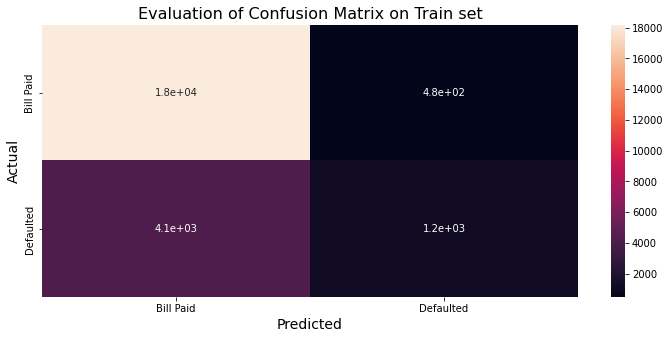

In [46]:
cm_test = confusion_matrix(y_train, pred_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

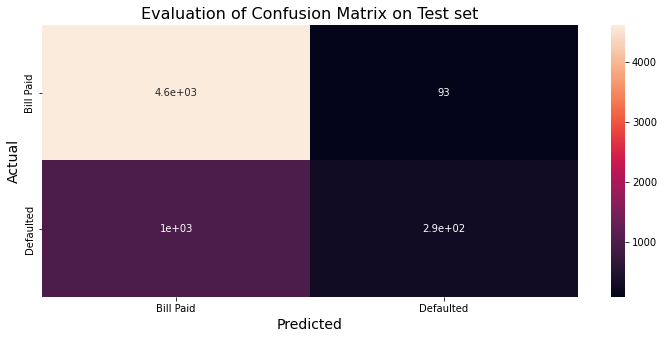

In [47]:
cm_test = confusion_matrix(y_test, pred_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **Cross Validation on Logistic Regression**

In [48]:
scoring = ['accuracy']
scores = cross_validate(regressor, X_train, y_train, scoring=scoring, cv=5,
                         return_train_score = True, return_estimator = True, verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.806, test=0.807), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.805, test=0.810), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.808, test=0.807), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.808, test=0.804), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.809, test=0.807), total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [49]:
scores['train_accuracy']

array([0.80625   , 0.80489583, 0.80817708, 0.80833333, 0.80885417])

The above are the accuracy scores for all the 5 cross validation train sets.

In [50]:
scores['test_accuracy']

array([0.80708333, 0.81041667, 0.806875  , 0.804375  , 0.80708333])

The above are the accuracy scores for all the 5 cross validation test sets.

# **SGD Classifier**

In [51]:
#importing libraries
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [52]:
# SGD Classifier implimentation
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
#Train the model with the training set
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [53]:
#defining the predict variable
pred_test = sgd.predict(X_test)

**Model Evaluation**

In [54]:
accuracy = accuracy_score(y_test,pred_test)
accuracy 

0.8141666666666667

The model is trained on Stocastic Gradient Decient and the accuracy on test data is of 81.42%.

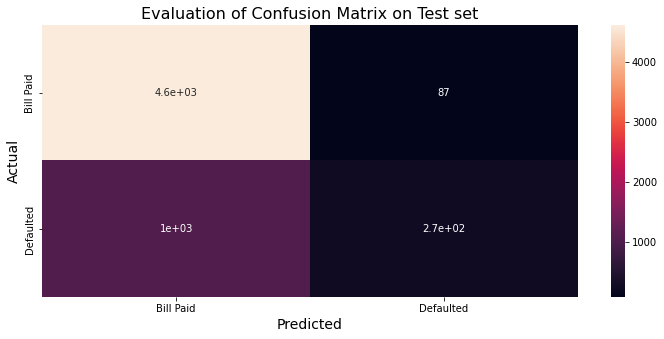

In [55]:
cm_test = confusion_matrix(y_test, pred_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **K Near Neighbor Classifier**

In [56]:
df = data[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]

df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
2,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
3,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
4,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
5,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


**Importing libraries**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

**Scaling the data**

In [58]:
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
scaled_data = scaler.transform(df.drop('default payment next month', axis=1))

In [60]:
data_feat = pd.DataFrame(scaled_data, columns=df.columns[:-1])
data_feat.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [77]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [78]:
#defining the predicted variable
pred_test = knn.predict(X_test)

In [79]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.7321666666666666

The model is trained with the KNear Neighbor where k=1 and the accuracy is 72.2%

In [63]:
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4703
           1       0.39      0.41      0.40      1297

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000



**Finding the best K value**

In [64]:
accuracy_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, df['default payment next month'], cv=10)
    accuracy_rate.append(score.mean())

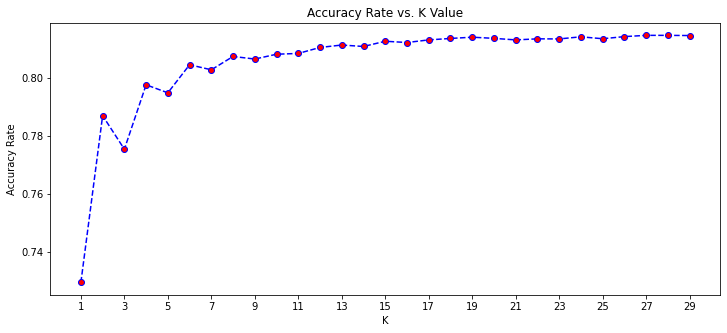

In [65]:
plt.figure(figsize=(12,5))
plt.plot(range(1, 30), accuracy_rate, 'b--', marker='o', markerfacecolor='red')
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1, 30, 2))
plt.ylabel('Accuracy Rate')
plt.show()

k at 15 is considered as the best value, as it have the good accuracy rate

In [66]:
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, df['default payment next month'], cv=10)
    error_rate.append(1-(score.mean()))

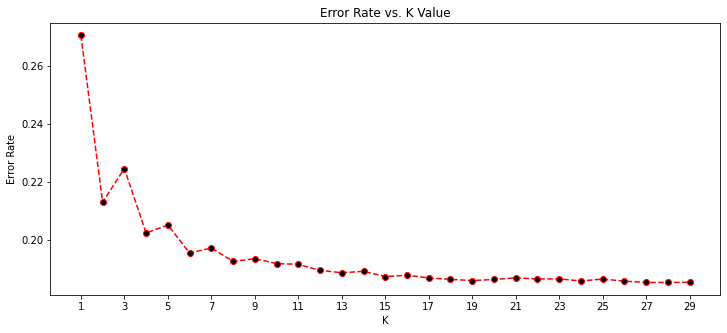

In [67]:
plt.figure(figsize=(12,5))
plt.plot(range(1, 30), error_rate, 'r--', marker = 'o', markerfacecolor='k')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1, 30, 2))
plt.ylabel('Error Rate')
plt.show()

k at 15 shows the low rate of error, eventhough it goes down after that when we compare it with the accuracy at same point thats better to cosider the k value at 15

In [80]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [81]:
#defining the predicted variable
pred_test = knn.predict(X_test)

In [82]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.8141666666666667

In [70]:
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4703
           1       0.62      0.35      0.45      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



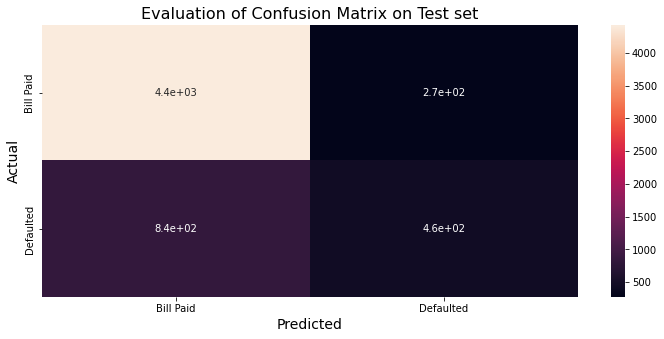

In [71]:
cm_test = confusion_matrix(y_test, pred_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **Naive Bayes**

In [72]:
from sklearn.naive_bayes import GaussianNB

default_prediction = GaussianNB()
default_prediction.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
pred_train = default_prediction.predict(X_train)
pred_test = default_prediction.predict(X_test)

In [85]:
#Accuracy Test
accuracy = accuracy_score(y_train,pred_train)
accuracy

0.7230833333333333

The model is trained on Naive Bayes and the accuracy on training dataset is of 72.31%.

In [74]:
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.74      0.80      4703
           1       0.40      0.64      0.49      1297

    accuracy                           0.72      6000
   macro avg       0.64      0.69      0.65      6000
weighted avg       0.78      0.72      0.74      6000



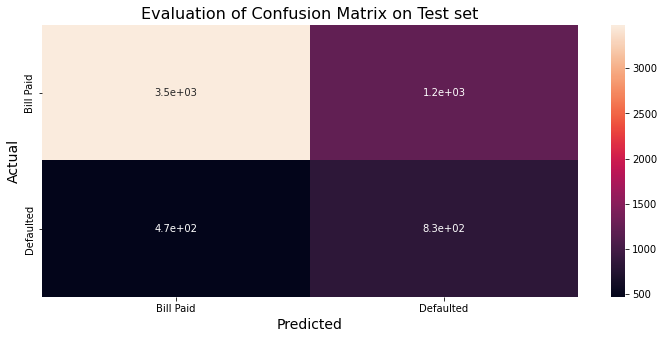

In [75]:
cm_test = confusion_matrix(y_test, pred_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [86]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.718

The model is trained on Naive Bayes and the accuracy on test data is of 72%.